In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

    location  time           gdp
0        AUS  2007  39612.856505
1        AUS  2008  40094.833205
2        AUS  2009  41613.636163
3        AUS  2010  42812.136116
4        AUS  2011  44419.309749
5        AUS  2012  43879.180355
6        AUS  2013  47761.214060
7        AUS  2014  47638.633438
8        AUS  2015  47351.047292
9        AUS  2016  50262.606439
10       AUS  2017  51993.845657
11       AUT  2007  39393.953567
12       AUT  2008  41316.022642
13       AUT  2009  40935.528801
14       AUT  2010  42017.796539
15       AUT  2011  44469.209642
16       AUT  2012  46477.655075
17       AUT  2013  47936.677963
18       AUT  2014  48813.534409
19       AUT  2015  49955.456118
20       AUT  2016  51790.942027
21       AUT  2017  53952.333840
22       BEL  2007  36871.587882
23       BEL  2008  38133.402295
24       BEL  2009  38010.548920
25       BEL  2010  40050.436930
26       BEL  2011  41450.360532
27       BEL  2012  42585.153110
28       BEL  2013  43745.951564
29       B

count       620.000000
mean      31670.005686
std       16430.467569
min        2589.986172
25%       19486.551190
50%       30931.789971
75%       41298.975872
max      107525.195588
Name: gdp, dtype: float64

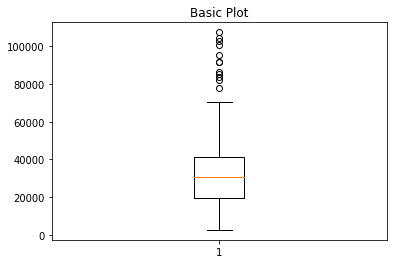

In [308]:
gdp = pd.read_csv('Gross domestic product (GDP).csv', sep=',')
#
gdp= gdp.drop(['Flag Codes', 'FREQUENCY','INDICATOR'], axis=1)
gdp = gdp.rename(columns={"LOCATION": "location", "TIME": "time","Value":"gdp"})


gdp = gdp[gdp.time >= 2007]
gdp = gdp[gdp.time <= 2017]
gdp = gdp[gdp.location != 'OECD']
gdp = gdp[gdp.MEASURE =='USD_CAP']

#print(gdp)

gdp = gdp.reset_index()

pop = pd.read_csv('worldPopulation.csv', sep=',')
pop = pop.drop(['name'], axis=1)


#for i in range(len(gdp.gdp)):
#    for j in range(len(pop.code)):
#        if(gdp.location[i] == pop.code[j]):
            #print(pop.code[j])
            #print(pop['pop'][j])
            #print(gdp.gdp[i])

gdp = gdp.drop(['index'], axis=1)
gdp= gdp.drop(['MEASURE','SUBJECT'], axis=1)
#print(gdp)

print(gdp)
import numpy as np
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(gdp.gdp)

gdp.gdp.describe(include='all')

In [309]:
Hours_worked = pd.read_csv('Hours_worked.csv', sep=',')
Hours_worked= Hours_worked.drop(['Flag Codes', 'FREQUENCY','MEASURE','SUBJECT','INDICATOR'], axis=1)
Hours_worked = Hours_worked.rename(columns={"LOCATION": "location", "TIME": "time","Value":"hours_worked"})

Hours_worked = Hours_worked[Hours_worked.time >= 2007]
Hours_worked = Hours_worked[Hours_worked.time <= 2017]
Hours_worked = Hours_worked[Hours_worked.location != 'OECD']
#print(Hours_worked)

#Hours_worked

In [310]:
polu = pd.read_csv('Air pollution exposure.csv', sep=',')
polu= polu.drop(['Flag Codes', 'FREQUENCY','MEASURE','SUBJECT','INDICATOR'], axis=1)
polu = polu.rename(columns={"LOCATION": "location", "TIME": "time","Value":"pollution"})

polu = polu[polu.time >= 2007]
polu = polu[polu.time <= 2017]
polu = polu[polu.location != 'OECD']

In [311]:
edu = pd.read_csv('Adult education level.csv', sep=',')
edu= edu.drop(['Flag Codes', 'FREQUENCY','MEASURE','INDICATOR'], axis=1)
edu = edu.rename(columns={"LOCATION": "location", "TIME": "time","Value":"education"})

edu = edu[edu.time >= 2007]
edu = edu[edu.time <= 2017]
edu = edu[edu.location != 'OECD']
edu = edu[edu.SUBJECT == 'BUPPSRY']
edu= edu.drop(['SUBJECT'], axis=1)
edu.education = 100-edu.education
#print(edu)

In [312]:
import json

data = pd.read_json (r'HealthyData.json')

data = pd.DataFrame(data, columns=data.columns)
data= data.drop(['hours_worked','gdp','education'], axis=1)



data = data.dropna()
data.describe(include='all')
#print(data)
data.replace('NaN', -1)
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='constant', fill_value='NaN', missing_values=-1, copy=True)
imp.fit(data.values)
mat = imp.transform(data.values)
data = pd.DataFrame(mat, columns=data.columns)
data.describe(include='all')




#data.to_csv(r'healthyData-1Missing.csv', index = False)
#print(data)
#data.describe(include='all')

#print(data.keys())

merged_inner = pd.merge(left=data,right=Hours_worked, how='outer', 
                        left_on=['time','location'], right_on=['time','location'])

merged_inner = pd.merge(left=merged_inner,right=gdp, how='outer', 
                        left_on=['time','location'], right_on=['time','location'])



merged_inner = pd.merge(left=merged_inner,right=edu, how='outer', 
                        left_on=['time','location'], right_on=['time','location'])

#print(merged_inner)

merged_inner.to_csv(r'healthyData_HW.csv', index = False)
merged_inner.describe(include='all')

#print(merged_inner)

#for i in pop.code:
    #for j in merged_inner:
        #if i == j:
            #print(j)
            



,alcohol,average_wages,cancer,employment_rate,happiness,life_at_birth,life_at_old,location,obese,pollution,smokers,social_spending,suicide,time,hours_worked,gdp,education
count,1685,1685,1685,1685,1685,1685,1685,1722,1685,1685,1685,1685,1685,1722.000000,415.000000,620.000000,456.000000
unique,114,265,324,226,52,150,116,180,158,335,146,345,176,NaN,NaN,NaN,NaN
top,,,,,,,,GTM,,,,,,NaN,NaN,NaN,NaN
freq,1224,1236,1291,1223,740,1202,1369,11,1480,1259,1426,1341,1292,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.509872,1718.345639,31670.005686,72.597027
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.976016,207.606558,16430.467569,18.179592
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,1360.400000,2589.986172,20.603844
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,1546.000000,19486.551190,64.788565
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,1716.000000,30931.789971,78.268952
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,1805.500000,41298.975872,86.510567


In [299]:
for j in merged_inner:
    print(j)
    
    
    
    
for j in merged_inner:
    print()
    if j != 'location':
        for i in range (len(merged_inner[j])):
            try:     
                merged_inner[j][i] = float(merged_inner[j][i])
            except:
                merged_inner[j][i] = None

        merged_inner[j] = merged_inner[j].astype('float64')
    
merged_inner.describe(include='all')



alcohol
average_wages
cancer
employment_rate
happiness
life_at_birth
life_at_old
location
obese
pollution
smokers
social_spending
suicide
time
hours_worked
gdp
education



/Users/joaotiagoaparicio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyboardInterrupt: 

2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


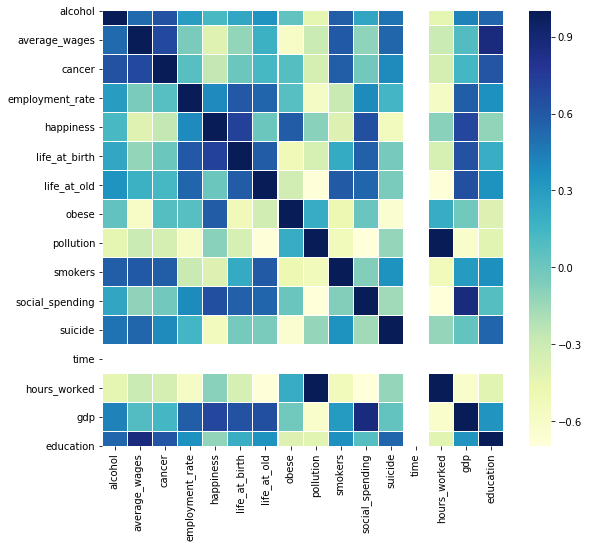

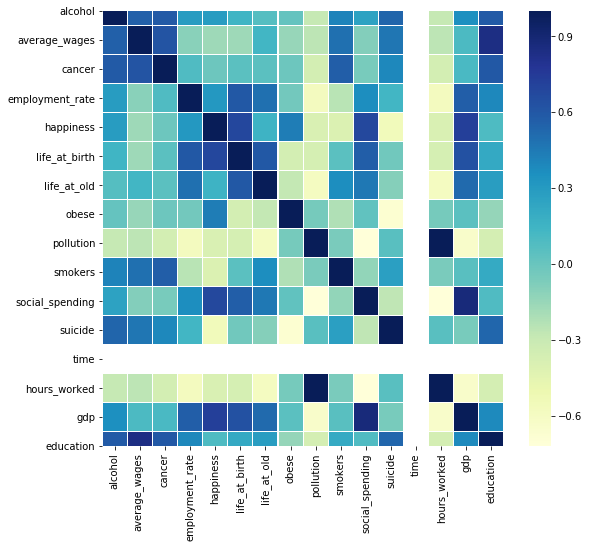

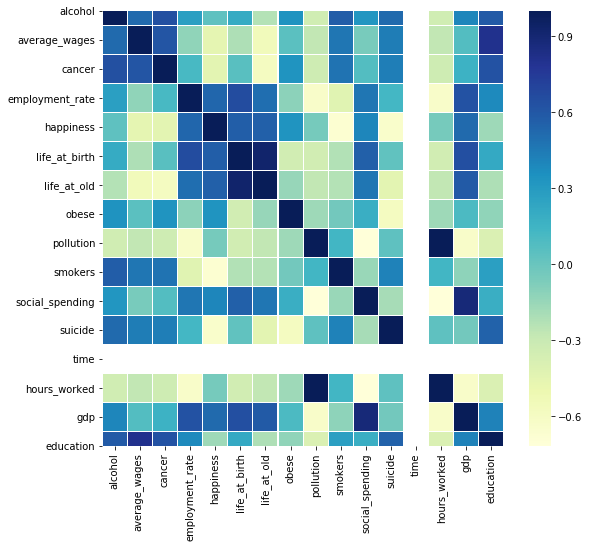

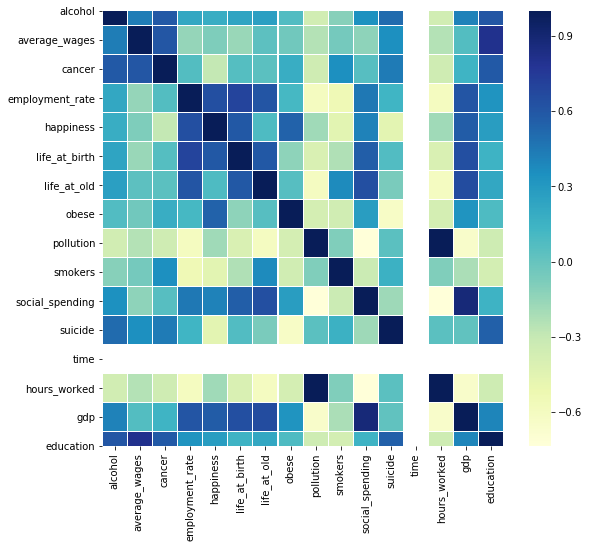

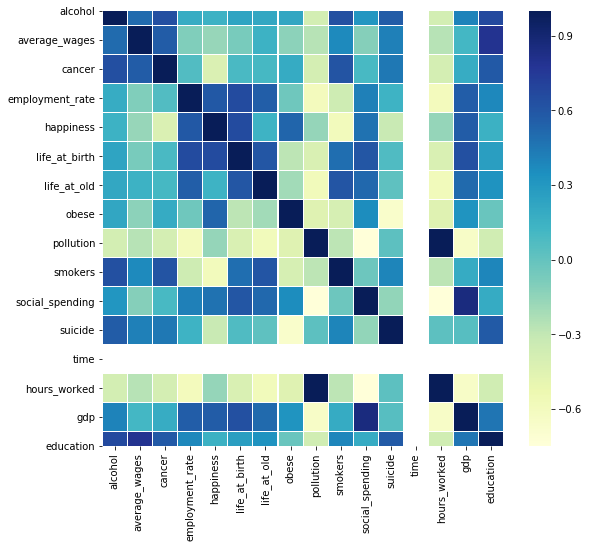

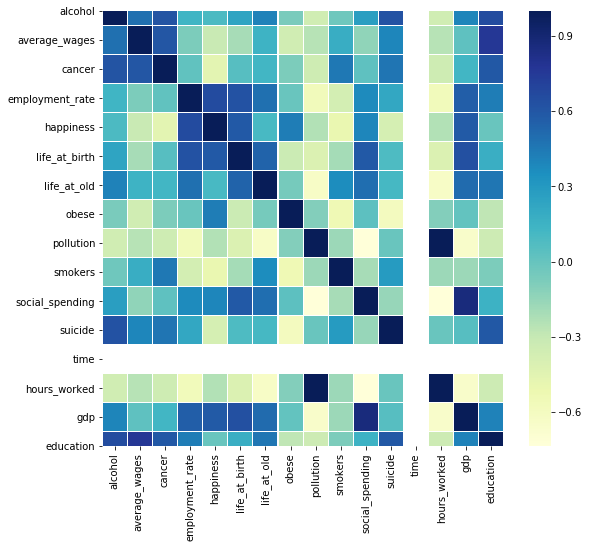

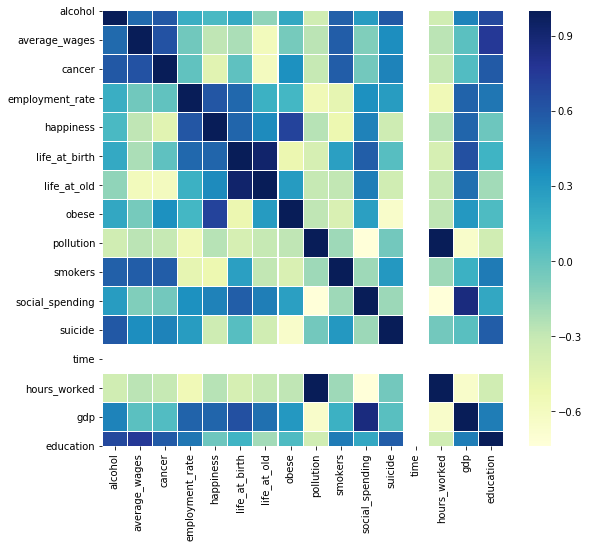

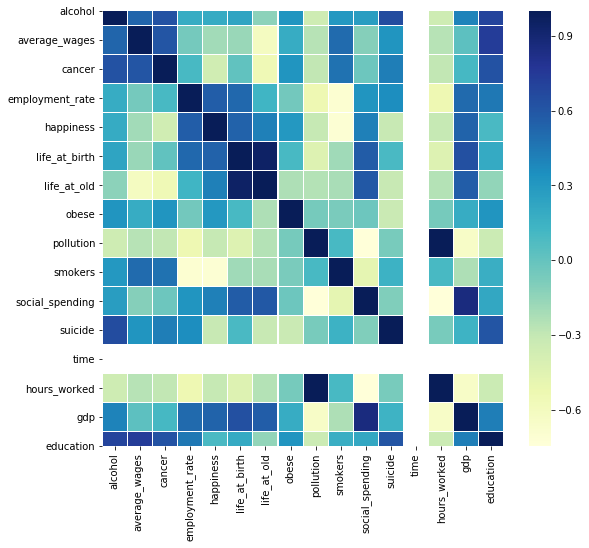

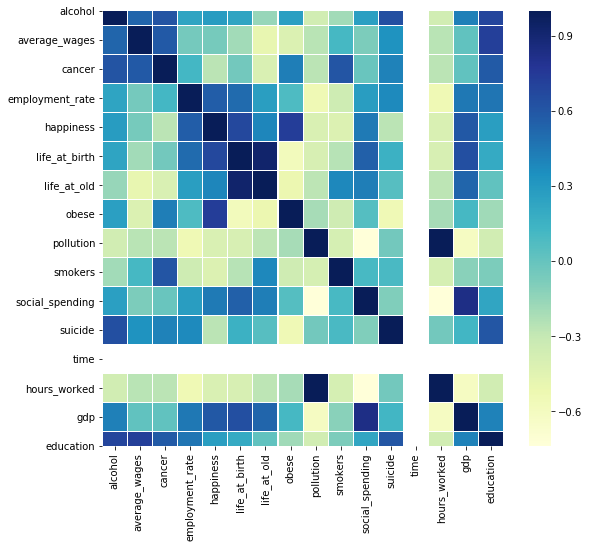

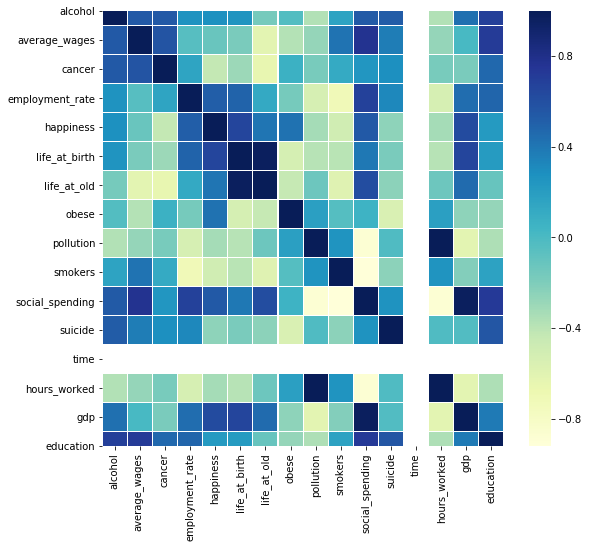

In [313]:
#merged_inner.to_csv(r'healthyData_HW.csv', index = False)
merged_inner = pd.read_csv('healthyData_HW.csv', sep=',')

for i in range(2007,2017):
    data = merged_inner[merged_inner.time == i]
    corrmat = data.corr()
    print(i)
    corrmat.to_csv(r'corr_'+str(i)+'.csv', index = False)
    
    f, ax = plt.subplots(figsize =(9, 8)) 
    sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
    
    #print(corrmat)
    


/Users/joaotiagoaparicio/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/joaotiagoaparicio/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


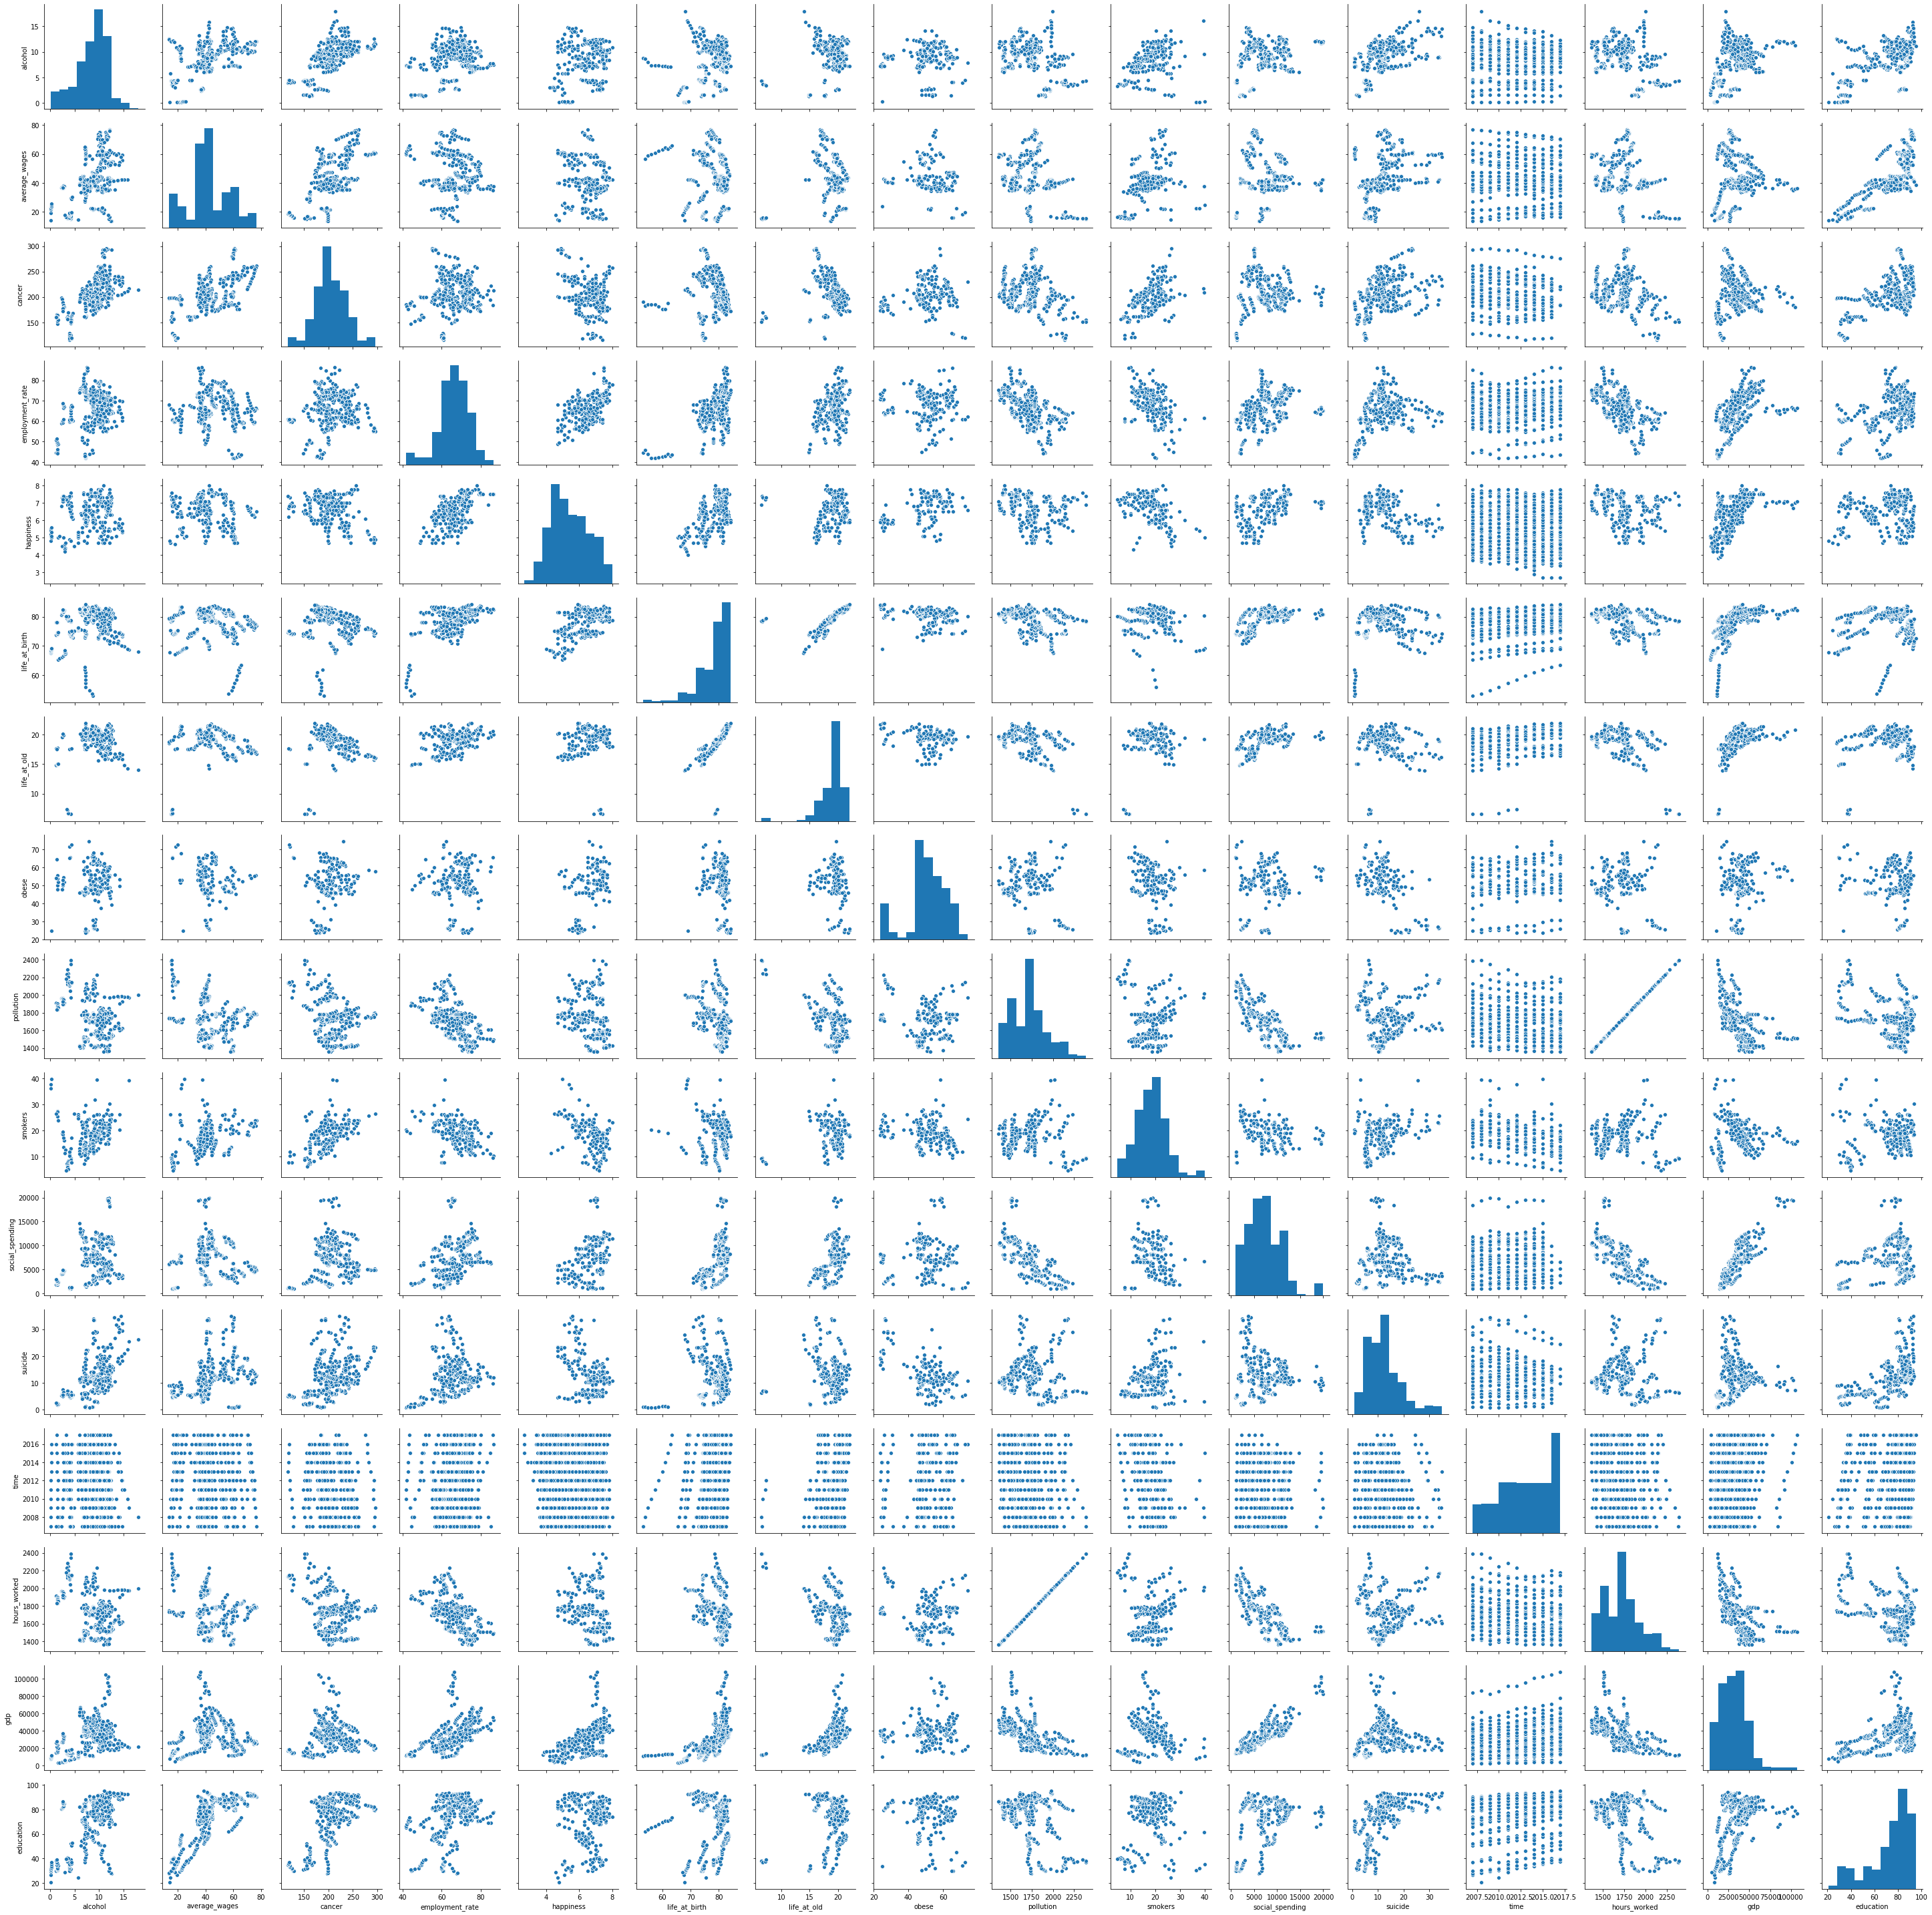

In [314]:
sns.pairplot(merged_inner)

In [315]:
corrmat = merged_inner.corr()
print(corrmat)



                  alcohol  average_wages    cancer  employment_rate  \
alcohol          1.000000       0.509714  0.618477         0.218838   
average_wages    0.509714       1.000000  0.596814        -0.081284   
cancer           0.618477       0.596814  1.000000         0.067952   
employment_rate  0.218838      -0.081284  0.067952         1.000000   
happiness        0.166375      -0.204870 -0.349066         0.537134   
life_at_birth    0.198450      -0.167568 -0.014833         0.583279   
life_at_old      0.120555      -0.093229 -0.133824         0.378108   
obese            0.095262      -0.144239  0.126589         0.004847   
pollution       -0.334277      -0.263687 -0.283998        -0.560566   
smokers          0.256378       0.331413  0.521653        -0.431882   
social_spending  0.289601      -0.076689  0.020128         0.372902   
suicide          0.565915       0.403816  0.421015         0.204880   
time            -0.060278      -0.000425 -0.170555         0.088455   
hours_

In [316]:
import json

merged_inner = pd.read_csv(r'healthyData_done.csv', sep=',')
merged_inner.describe(include='all')

,alcohol,average_wages,cancer,employment_rate,happiness,life_at_birth,life_at_old,location,obese,pollution,smokers,social_spending,suicide,time,hours_worked,gdp,education
count,461.00000,449.000000,394.000000,462.000000,945.000000,483.000000,316.000000,1722,205.000000,426.000000,259.000000,344.000000,393.000000,1722.000000,415.000000,620.000000,456.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8.62321,42.596214,205.233249,66.154545,5.434921,78.190476,18.936392,NaN,51.004146,1719.099296,18.277220,7316.560174,12.372010,2012.509872,1718.345639,31670.005686,72.597027
std,3.26963,14.296255,32.119960,7.776756,1.123878,5.031085,2.195921,NaN,11.143967,204.961955,5.918345,3659.536021,6.619396,2.976016,207.606558,16430.467569,18.179592
min,0.10000,13.800000,116.100000,41.800000,2.700000,53.100000,6.500000,NaN,23.700000,1360.400000,4.700000,986.300000,0.800000,2007.000000,1360.400000,2589.986172,20.603844
25%,7.10000,35.900000,185.250000,61.800000,4.600000,75.550000,18.100000,NaN,46.400000,1550.000000,14.250000,4636.500000,7.400000,2010.000000,1546.000000,19486.551191,64.788565
50%,9.20000,41.500000,202.850000,66.300000,5.300000,80.200000,19.500000,NaN,51.700000,1719.600000,18.400000,7013.250000,11.500000,2013.000000,1716.000000,30931.789971,78.268951
75%,10.80000,53.000000,226.175000,71.875000,6.300000,81.500000,20.100000,NaN,58.500000,1799.750000,21.950000,9667.950000,15.800000,2015.000000,1805.500000,41298.975872,86.510567


In [317]:

for i in range(2007,2018):
    data = merged_inner[merged_inner.time == i]
    corrmat = data.corr()
    print(i)
    
    Var=[]
    Time=[]
    for j in merged_inner:
        Var.append(j)
        Time.append(int(i))
    print(Var)
    Var.remove('location')
    Time.pop()
    print(len(corrmat.alcohol))
    corrmat.insert(0, "Var", Var, True) 
    corrmat.insert(0, "Time", Time, True) 
    corrmat = corrmat.drop(['time'], axis=1)
    print(corrmat)
    corrmat.to_csv(r'corr_'+str(i)+'.csv', index = False)
    #corrmat
    
    #f, ax = plt.subplots(figsize =(9, 8)) 
    #sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
    
    #print(corrmat)

2007
['alcohol', 'average_wages', 'cancer', 'employment_rate', 'happiness', 'life_at_birth', 'life_at_old', 'location', 'obese', 'pollution', 'smokers', 'social_spending', 'suicide', 'time', 'hours_worked', 'gdp', 'education']
16
                 Time              Var   alcohol  average_wages    cancer  \
alcohol          2007          alcohol  1.000000       0.527926  0.629292   
average_wages    2007    average_wages  0.527926       1.000000  0.681056   
cancer           2007           cancer  0.629292       0.681056  1.000000   
employment_rate  2007  employment_rate  0.299503      -0.041404  0.075204   
happiness        2007        happiness  0.126909      -0.399816 -0.258577   
life_at_birth    2007    life_at_birth  0.241613      -0.118427  0.010732   
life_at_old      2007      life_at_old  0.347962       0.179341  0.136479   
obese            2007            obese  0.041733      -0.599928  0.084492   
pollution        2007        pollution -0.431514      -0.296744 -0.346483   


2017
['alcohol', 'average_wages', 'cancer', 'employment_rate', 'happiness', 'life_at_birth', 'life_at_old', 'location', 'obese', 'pollution', 'smokers', 'social_spending', 'suicide', 'time', 'hours_worked', 'gdp', 'education']
16
                 Time              Var   alcohol  average_wages    cancer  \
alcohol          2017          alcohol  1.000000       0.574672  0.999910   
average_wages    2017    average_wages  0.574672       1.000000  0.523332   
cancer           2017           cancer  0.999910       0.523332  1.000000   
employment_rate  2017  employment_rate  0.225462      -0.036097 -0.663560   
happiness        2017        happiness -0.246967       0.013749 -0.904447   
life_at_birth    2017    life_at_birth -0.238300      -0.212015 -0.833229   
life_at_old      2017      life_at_old -0.019097      -0.724728 -0.884760   
obese            2017            obese -0.067341      -0.182890       NaN   
pollution        2017        pollution -0.089621      -0.285590  0.742893   
